In [1]:
#### Classifying movie reviews: a binary classification example

# loading the IMDB dataset
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


Using TensorFlow backend.


In [2]:
# encoding the integer sequences into a binary matrix
import numpy as np

def vectorize_sequences(sequences, dimention=10000):
    results = np.zeros((len(sequences), dimention))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [3]:
# setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [4]:
# the model definition
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [5]:
# compiling the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


In [6]:
# training your model
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 21s 1ms/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 7s 491us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 6s 401us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 6s 378us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 6s 391us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 5s 364us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 6s 411us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - v

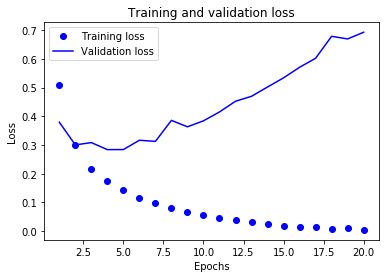

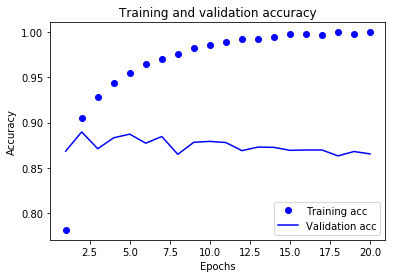

In [7]:
# plotting the training and validation loss
%matplotlib inline
import matplotlib.pyplot as plt

history_dict = history.history
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [8]:
# retraining a model from scratch
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results


Epoch 1/4
25000/25000 [==============================] - 8s 302us/step - loss: 0.2164 - acc: 0.9460
Epoch 2/4
25000/25000 [==============================] - 7s 271us/step - loss: 0.1398 - acc: 0.9581
Epoch 3/4
25000/25000 [==============================] - 7s 276us/step - loss: 0.1095 - acc: 0.9673
Epoch 4/4
25000/25000 [==============================] - 3s 137us/step


[0.5057765049791336, 0.85972]

In [9]:
# using a trained network to generate predictions on new data
model.predict(x_test)


array([[0.01333093],
       [0.99999917],
       [0.9966204 ],
       ...,
       [0.197177  ],
       [0.10551485],
       [0.7673868 ]], dtype=float32)